<a href="https://colab.research.google.com/github/wissal-mahri/data-science-colab-projects/blob/main/PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
df.head()



Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Afficher les 5 premières lignes
print("🔹 5 premières lignes du dataset :")
print(df.head())

# Informations générales sur le dataset
print("\n🔹 Informations sur le dataset :")
print(df.info())

🔹 5 premières lignes du dataset :
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

🔹 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  

**2067 valeurs manquantes pm2.5**


In [ ]:
# Nombre total de valeurs manquantes par colonne
print("🔹 Valeurs manquantes par colonne :")
print(df.isnull().sum())


🔹 Valeurs manquantes par colonne :
No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [ ]:
# Pourcentage de valeurs manquantes
print("\n🔹 Pourcentage de valeurs manquantes :")
print((df.isnull().mean() * 100).round(2))


🔹 Pourcentage de valeurs manquantes :
No       0.00
year     0.00
month    0.00
day      0.00
hour     0.00
pm2.5    4.72
DEWP     0.00
TEMP     0.00
PRES     0.00
cbwd     0.00
Iws      0.00
Is       0.00
Ir       0.00
dtype: float64


In [ ]:
print("\n🔹 Nombre de lignes dupliquées :", df.duplicated().sum())
import pandas as pd




🔹 Nombre de lignes dupliquées : 0


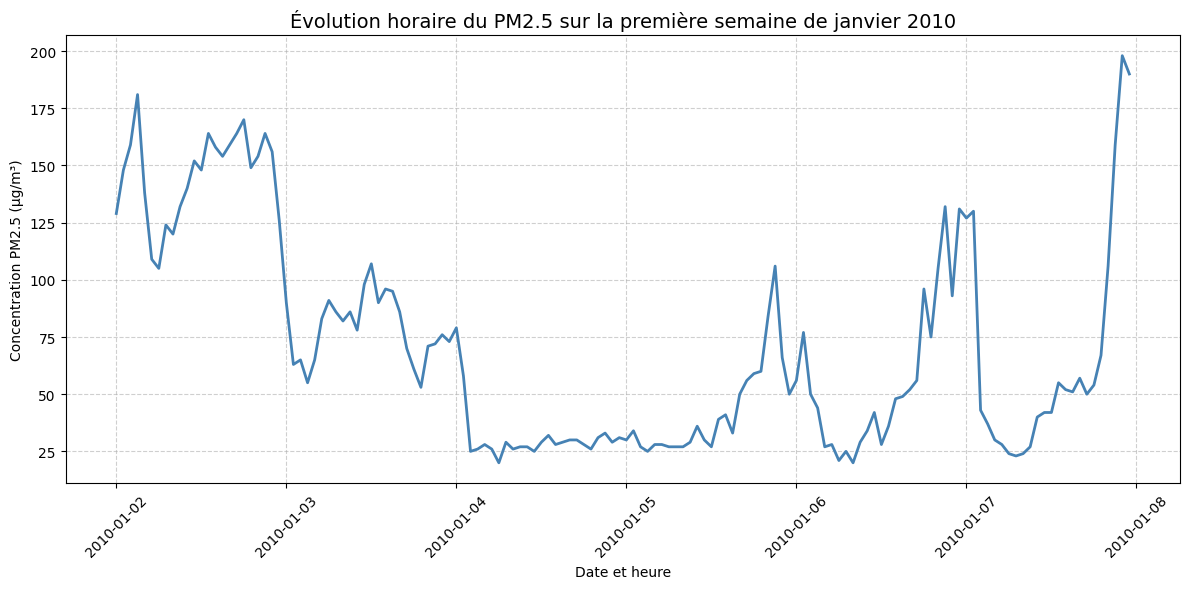

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une colonne datetime à partir de l’année, du mois, du jour et de l’heure
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Filtrer une semaine (ex : du 1er au 7 janvier 2010)
week_df = df[(df['datetime'] >= '2010-01-01') & (df['datetime'] < '2010-01-08')]

# Supprimer les valeurs manquantes de PM2.5
week_df = week_df.dropna(subset=['pm2.5'])

# Tracer la courbe
plt.figure(figsize=(12,6))
sns.lineplot(x='datetime', y='pm2.5', data=week_df, color='steelblue', linewidth=2)

plt.title("Évolution horaire du PM2.5 sur la première semaine de janvier 2010", fontsize=14)
plt.xlabel("Date et heure")
plt.ylabel("Concentration PM2.5 (µg/m³)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **NETTOYAGE**

In [ ]:
# Vérifier les colonnes existantes
print("Colonnes avant suppression :")
print(df.columns.tolist())

# Supprimer les colonnes 'No', 'year', 'month', 'day', 'hour'
df = df.drop(columns=['No', 'year', 'month', 'day', 'hour','datetime'], errors='ignore')

# Vérifier le résultat
print("\nColonnes après suppression :")
print(df.columns.tolist())


Colonnes avant suppression :
['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'datetime']

Colonnes après suppression :
['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


In [ ]:
# Interpolation linéaire des valeurs manquantes de PM2.5
df['pm2.5'] = df['pm2.5'].interpolate(method='linear')
# Backfill pour les éventuelles valeurs encore manquantes au début
df['pm2.5'] = df['pm2.5'].bfill()
# Vérification du résultat
print("🔹 Valeurs manquantes après interpolation :", df['pm2.5'].isna().sum())

🔹 Valeurs manquantes après interpolation : 0


# **Encoding**

In [ ]:
# Identifier les colonnes catégorielles à encoder
categorical_cols = ['cbwd']  # tu peux ajouter d'autres colonnes catégorielles si besoin

# Appliquer One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix='wind').astype(int)

# Vérification
print("Colonnes après One-Hot Encoding :")
df_encoded.head()

Colonnes après One-Hot Encoding :


,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,wind_NE,wind_NW,wind_SE,wind_cv
0,129,-21,-11,1021,1,0,0,0,1,0,0
1,129,-21,-12,1020,4,0,0,0,1,0,0
2,129,-21,-11,1019,6,0,0,0,1,0,0
3,129,-21,-14,1019,9,0,0,0,1,0,0
4,129,-20,-12,1018,12,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Colonnes numériques à normaliser
numeric_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser uniquement les colonnes numériques
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
# Vérification
df_cleaned=df_encoded
df_cleaned.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,wind_NE,wind_NW,wind_SE,wind_cv
0,0.129779,0.279412,0.131148,0.545455,0.001709,0.0,0.0,0,1,0,0
1,0.129779,0.279412,0.114754,0.527273,0.006838,0.0,0.0,0,1,0,0
2,0.129779,0.279412,0.131148,0.509091,0.010256,0.0,0.0,0,1,0,0
3,0.129779,0.279412,0.081967,0.509091,0.015385,0.0,0.0,0,1,0,0
4,0.129779,0.294118,0.114754,0.490909,0.020513,0.0,0.0,0,1,0,0


In [ ]:
import numpy as np
import pandas as pd

def create_sequences(data, seq_length):
    """
    Crée des séquences à partir d'un dataset.

    Paramètres :
    ----------
    data : array-like (numpy array ou DataFrame pandas)
        Dataset numérique (features + éventuellement target).
    seq_length : int
        Longueur de chaque séquence (nombre de pas de temps).

    Retour :
    -------
    X : numpy array
        Séquences de shape (num_sequences, seq_length, num_features)
    y : numpy array
        Valeurs cibles correspondantes à chaque séquence (ici colonne 0)
    """
    # Convertir en numpy array si data est un DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    X = []
    y = []

    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]       # séquence de longueur seq_length
        target = data[i+seq_length][0]  # cible : colonne 0 (PM2.5)
        X.append(seq)
        y.append(target)

    return np.array(X), np.array(y)


In [ ]:
seq_length = 24  # par exemple, 24 heures
X, y = create_sequences(df_cleaned, seq_length)

print("Shape de X :", X.shape)  # (num_sequences, seq_length, num_features)
print("Shape de y :", y.shape)  # (num_sequences,)


Shape de X : (43800, 24, 11)
Shape de y : (43800,)


In [ ]:
# Supposons que X et y sont déjà créés avec create_sequences
num_samples = len(X)

# Indices pour les splits
train_size = int(0.7 * num_samples)
val_size = int(0.15 * num_samples)
test_size = num_samples - train_size - val_size
# Split des données
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

# Vérification
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (30659, 24, 11)
Validation shape: (6570, 24, 11)
Test shape: (6571, 24, 11)


# **SIMPLE RNN**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0076 - val_loss: 6.6635e-04
Epoch 2/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.0211e-04 - val_loss: 5.4124e-04
Epoch 3/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.3473e-04 - val_loss: 6.3526e-04
Epoch 4/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.5978e-04 - val_loss: 5.8274e-04
Epoch 5/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.5225e-04 - val_loss: 0.0012
Epoch 6/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.4419e-04 - val_loss: 5.5912e-04
Epoch 7/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.9457e-04 - val_loss: 7.4413e-04
Epoch 8/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.2641e-04 - val_loss: 5.3514e-04
Epoch 9/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.2340e-04 - val_loss: 4.8540e-04
Epoch 10/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.6737e-04 - val_loss: 6.3490e-04
Epoch 11/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.05

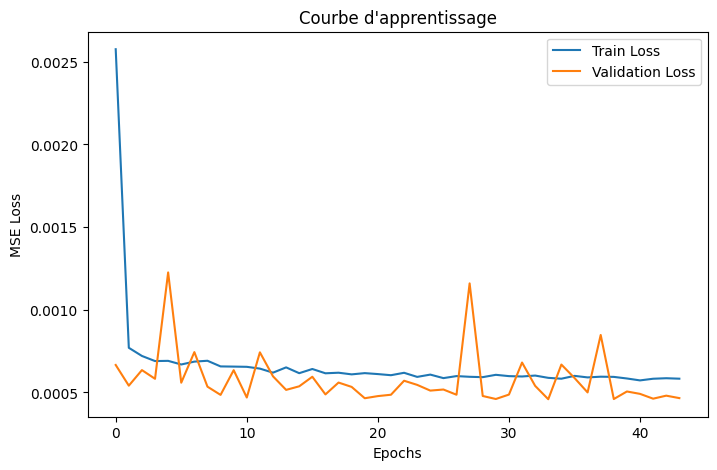

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# 1️⃣ Créer le modèle
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='linear')  # Prédiction continue
])

# 2️⃣ Compiler le modèle
model.compile(optimizer='adam', loss='mse')

# 3️⃣ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4️⃣ Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)



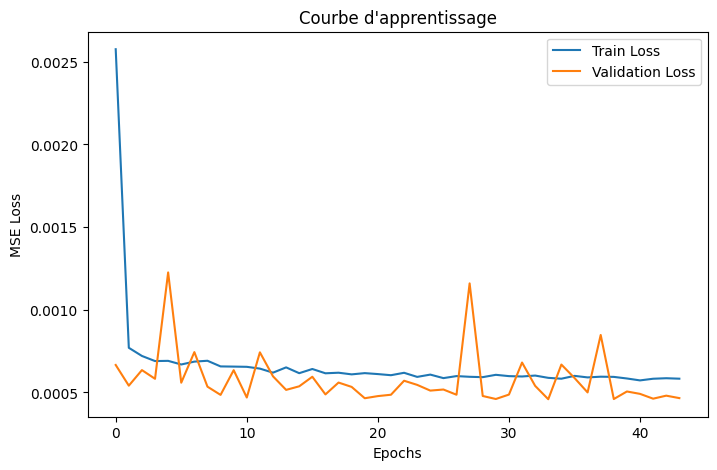

In [ ]:
# 5️⃣ Tracer la courbe d'apprentissage
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()
